# Colour Selection

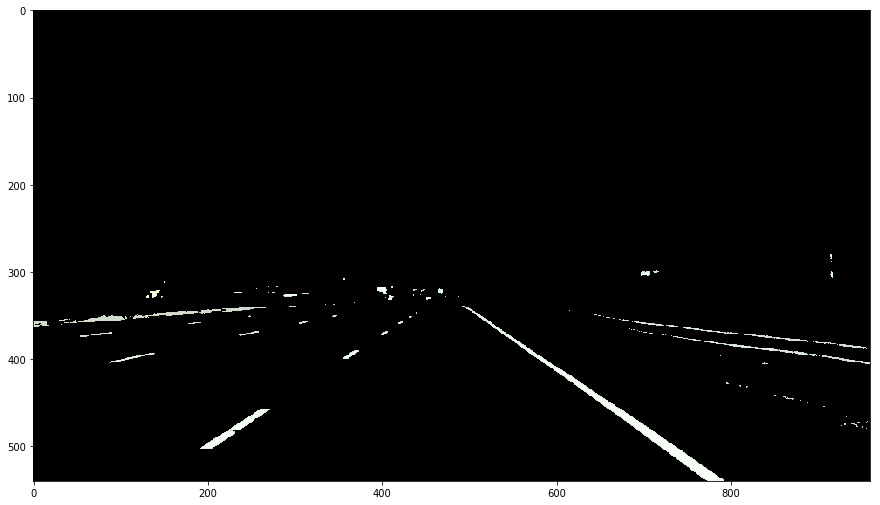

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.figure(figsize=(15,15))
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
mpimg.imsave("test-after.jpg", color_select)

# Coding up a Region of Interest Mask

Awesome! Now you've seen that with a simple color selection we have managed to eliminate almost everything in the image except the lane lines.

At this point, however, it would still be tricky to extract the exact lines automatically, because we still have some other objects detected around the periphery that aren't lane lines.

In this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image. Next, I'll take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines.

Check out the code below. The variables *__left_bottom__*, *__right_bottom__*, and *__apex__* represent the vertices of a triangular region that I would like to retain for my color selection, while masking everything else out. Here I'm using a triangular mask to illustrate the simplest case, but later you'll use a quadrilateral, and in principle, you could use any polygon.

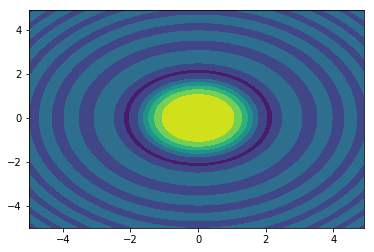

In [2]:
## example of NumPy.meshgrid.

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

This image is:  <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


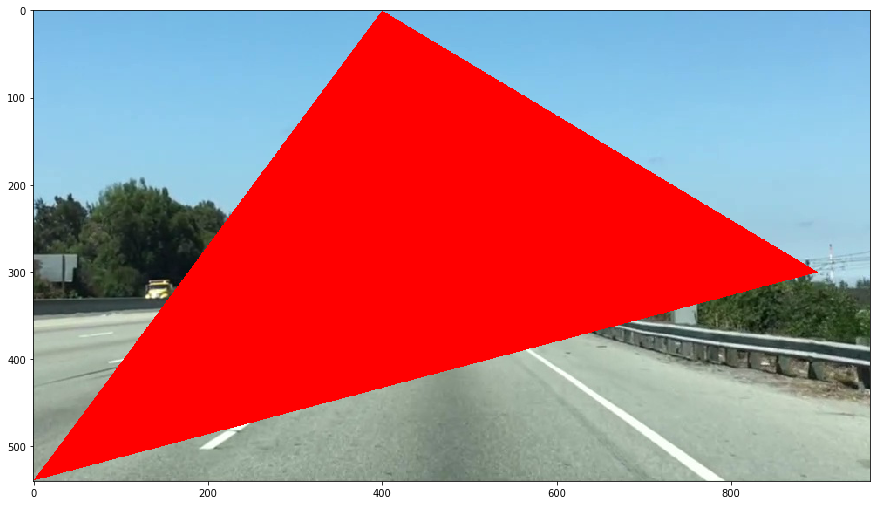

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image),
         'with dimesions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.figure(figsize=(15,15))
plt.imshow(region_select)

In this next quiz, I've given you the values of *__red_threshold__*, *__green_threshold__*, and *__blue_threshold__* but now you need to modify *__left_bottom__*, *__right_bottom__*, and *__apex__* to represent the vertices of a triangle identifying the region of interest in the image. When you run the code in the quiz, your output result will be several images. Tweak the vertices until your output looks like the examples shown below.

<img src="Quiz2.png" width="800px">

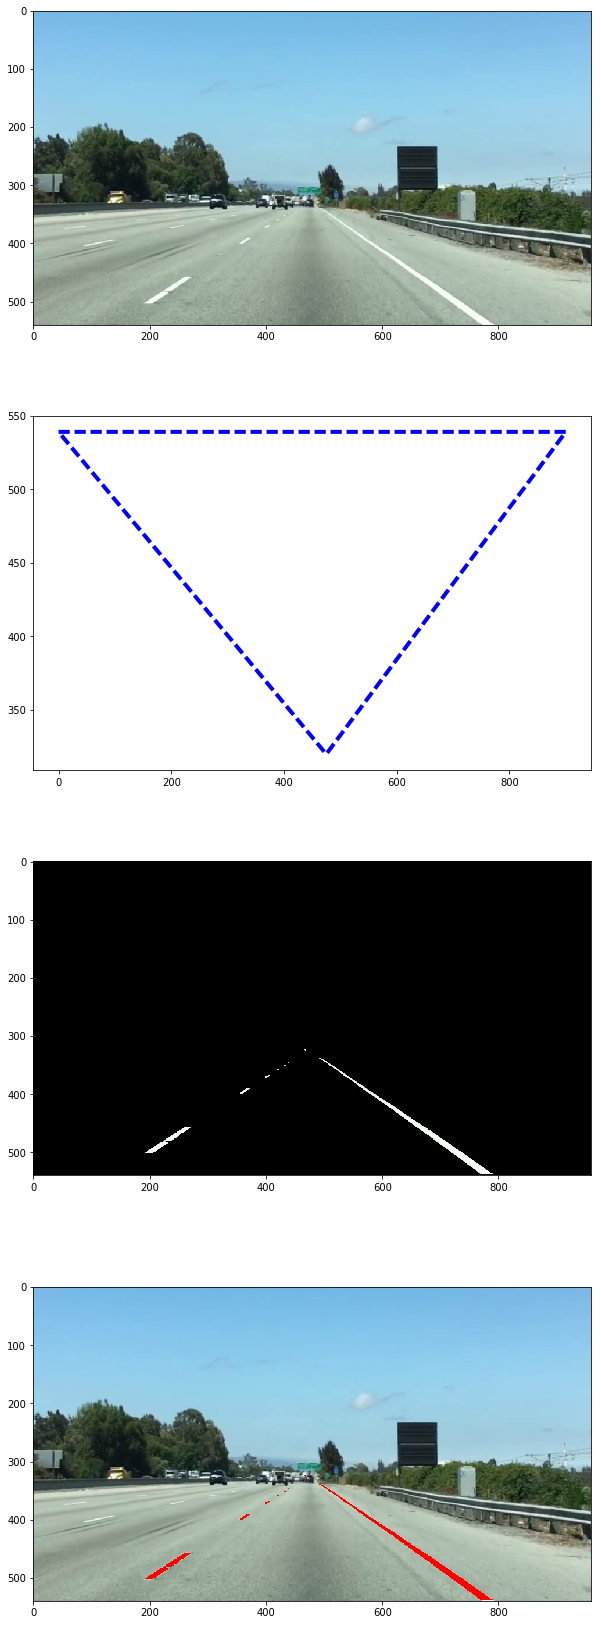

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Read in the image and print out some stats
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
fig, ax = plt.subplots(4, 1, figsize=[10, 30])

ax[0].imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
ax[1].plot(x, y, 'b--', lw=4)
ax[2].imshow(color_select)
ax[3].imshow(line_image)

# Canny Edge Detection

__Note! The standard location of the origin (x=0, y=0) for images is in the top left corner with y values increasing downward and x increasing to the right. This might seem weird at first, but if you think about an image as a matrix, it makes sense that the "00" element is in the upper left.__

Now let's try a quiz. Below, I’m plotting a cross section through this image. Where are the areas in the image that are most likely to be identified as edges?

(The red line in the plot above shows where I took a cross section through the image. The wiggles in the blue line indicate changes in intensity along that cross section through the image. Check all the boxes of the letters along this cross section, where you expect to find strong edges.)

<img src="Quiz3.png" width="800px">

__Answer:__ A, C, E

Now that you have a conceptual grasp on how the Canny algorithm works, it's time to use it to find the edges of the lane lines in an image of the road. So let's give that a try.

First, we need to read in an image:

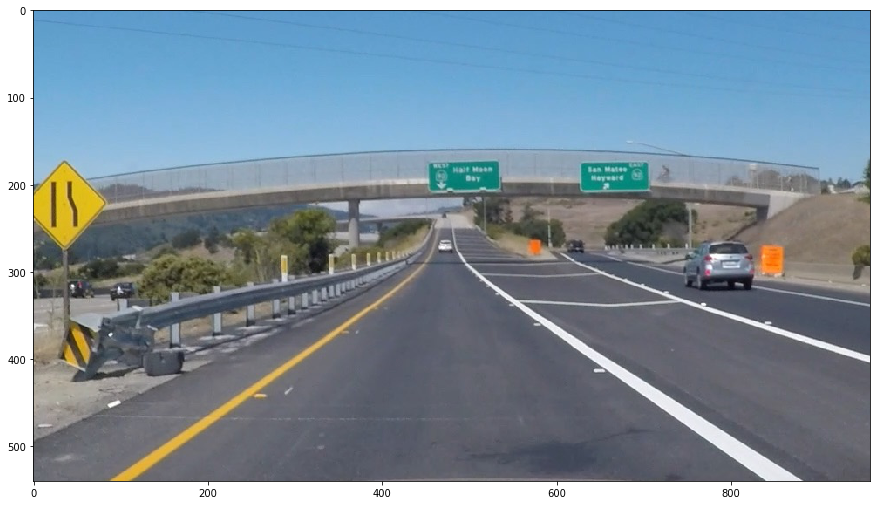

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('exit-ramp.jpg')
plt.figure(figsize=(15,15))
plt.imshow(image)

Here we have an image of the road, and it's fairly obvious by eye where the lane lines are, but what about using computer vision?

Let's go ahead and convert to grayscale.

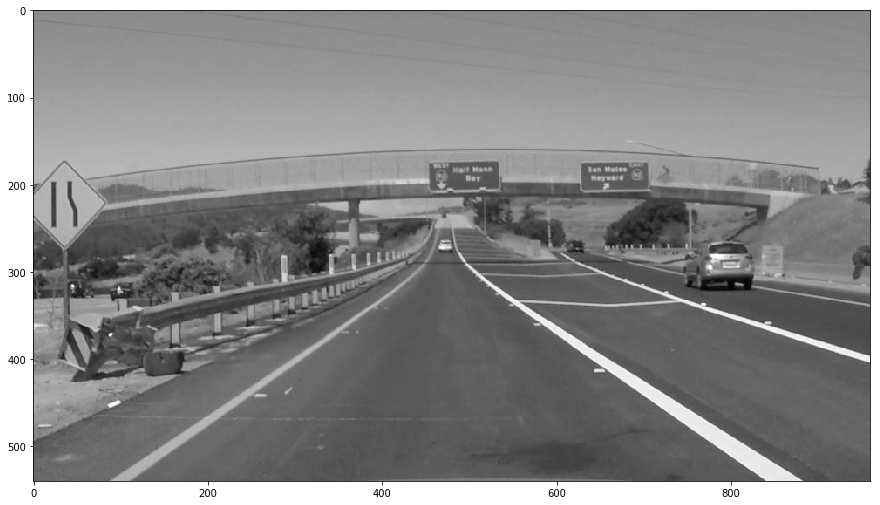

In [6]:
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion

plt.figure(figsize=(15,15))
plt.imshow(gray, cmap='gray')

Let’s try our Canny edge detector on this image. This is where OpenCV gets useful. First, we'll have a look at the parameters for the OpenCV Canny function. You will call it like this:

```python
edges = cv2.Canny(gray, low_threshold, high_threshold)
```

In this case, you are applying *__Canny__* to the image *__gray__* and your output will be another image called *__edges__*. *__low_threshold__* and *__high_threshold__* are your thresholds for edge detection.

The algorithm will first detect strong edge (strong gradient) pixels above the __*high_threshold*__, and reject pixels below the __*low_threshold*__. Next, pixels with values between the __*low_threshold*__ and __*high_threshold*__ will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else. See the [OpenCV Canny Docs](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html) for more details.

What would make sense as a reasonable range for these parameters? In our case, converting to grayscale has left us with an [8-bit](https://en.wikipedia.org/wiki/8-bit) image, so each pixel can take $2^8 = 256$ possible values. Hence, the pixel values range from 0 to 255.

This range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds. So, __a reasonable range for your threshold parameters would also be in the tens to hundreds__.

As far as a ratio of __*low_threshold*__ to __*high_threshold*__, [John Canny himself recommended](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html#steps) a low to high ratio of 1:2 or 1:3.

We'll also include Gaussian smoothing, before running __*Canny*__, which is essentially a way of suppressing noise and spurious gradients by averaging (check out the [OpenCV docs for GaussianBlur](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur)). __*cv2.Canny()*__ actually applies Gaussian smoothing internally, but we include it here because you can get a different result by applying further smoothing (and it's not a changeable parameter within __*cv2.Canny()*__!).

You can choose the __*kernel_size*__ for Gaussian smoothing to be any odd number. A larger *__kernel_size__* implies averaging, or smoothing, over a larger area. The example in the previous lesson was __*kernel_size*__ = 3.

Note: If this is all sounding complicated and new to you, don't worry! We're moving pretty fast through the material here, because for now we just want you to be able to use these tools. If you would like to dive into the math underpinning these functions, please check out the free Udacity course, __Intro to Computer Vision__, where the third lesson covers Gaussian filters and the sixth and seventh lessons cover edge detection.

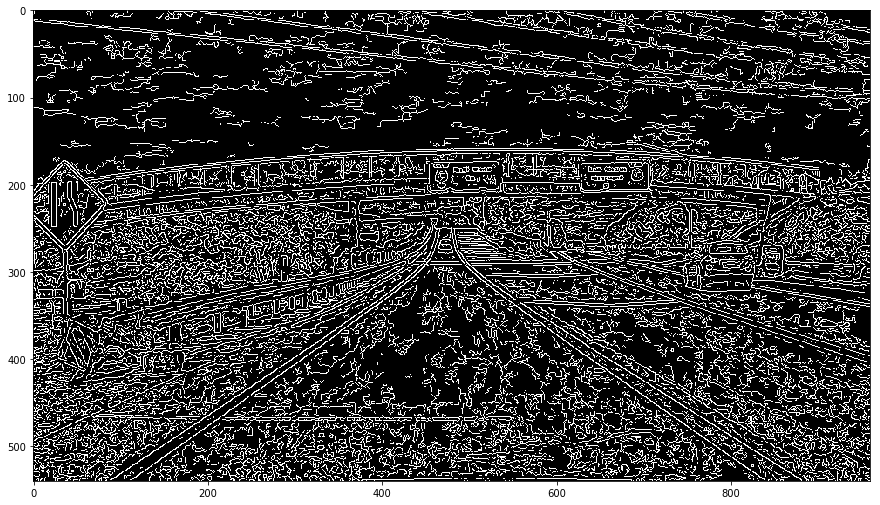

In [7]:
#doing all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in the image and convert to grayscale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 1
high_threshold = 10
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.figure(figsize=(15,15))
plt.imshow(edges, cmap='Greys_r')

Here I've called the OpenCV function __*Canny*__ on a Gaussian-smoothed grayscaled image called __*blur_gray*__ and detected edges with thresholds on the gradient of __*high_threshold*__, and __*low_threshold*__.

In the next quiz you'll get to try this on your own and mess around with the parameters for the Gaussian smoothing and Canny Edge Detection to optimize for detecting the lane lines and not a lot of other stuff.

Now it’s your turn! Try using Canny on your own and fiddle with the parameters for the Gaussian smoothing and Edge Detection to optimize for detecting the lane lines well without detecting a lot of other stuff. Your result should look like the example shown below.

  
The original image (left), and edge detection applied (right).

<img src="Quiz4.png" width="800px">

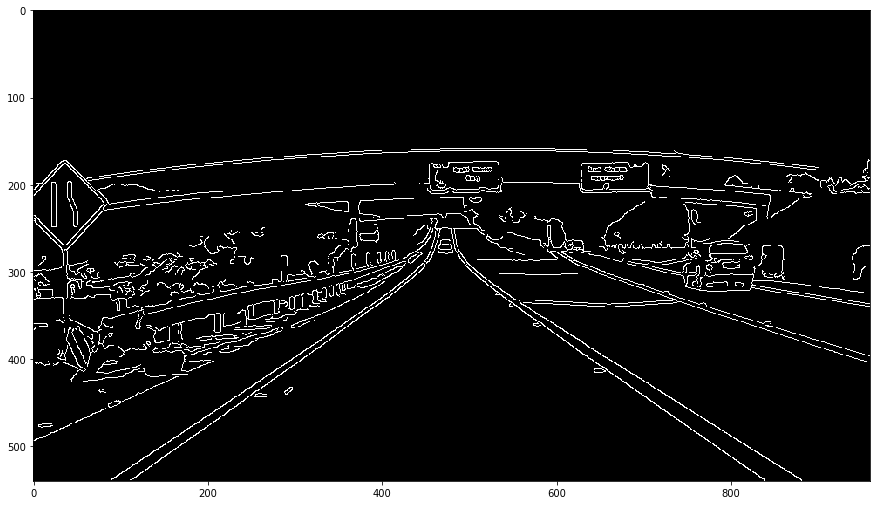

In [8]:
# Do all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in the image and convert to grayscale
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 50
high_threshold = low_threshold*3
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.figure(figsize=(15,15))
plt.imshow(edges, cmap='Greys_r')

# Hough Transform

In image space, a line is plotted as _x_ vs. _y_, but in 1962, Paul Hough devised a method for representing lines in parameter space, which we will call “Hough space” in his honor.

In Hough space, I can represent my "x vs. y" line as a point in "_m_ vs. _b_" instead. The Hough Transform is just the conversion from image space to Hough space. So, the characterization of a line in image space will be a single point at the position (_m, b_) in Hough space.

---
So now I’d like to check your intuition… if a __line__ in image space corresponds to a __point__ in Hough space, what would two __parallel lines__ in image space correspond to in Hough space?

__QUESTION 1 OF 5:__ What will be the representation in Hough space of two parallel lines in image space?
<img src="Quiz5.png" width="600px">

__Answer:__ C (Parallel lines have the same slope, which is to say, the same “m” parameter in our line model. So, in parameter space, two parallel lines would be represented by two points at the same m value, but different b values.)

---
Alright, so a line in image space corresponds to a point in Hough space. What does a point in image space correspond to in Hough space?

A single point in image space has many possible lines that pass through it, but not just any lines, only those with particular combinations of the m and b parameters. Rearranging the equation of a line, we find that a single point (x,y) corresponds to the line b = y - xm.

So what is the representation of a point in image space in Hough space?

__QUESTION 2 OF 5:__ What does a point in image space correspond to in Hough space?
<img src="Quiz6.png" width="600px">

__Answer:__ A (A point in image space describes a line in Hough space. So a line in an image is a point in Hough space and a point in an image is a line in Hough space… cool!)

---
What if you have 2 points in image space. What would that look like in Hough space?

__QUESTION 3 OF 5:__ What is the representation in Hough space of two points in image space?
<img src="Quiz7.png" width="600px">

__Answer:__ C ( Two points in image space correspond to two lines in Hough Space. Not only that, but these lines must intersect… why?)

---
Alright, now we have two intersecting lines in Hough Space. How would you represent their intersection at the point (m0, b0) in image space?

__QUESTION 4 OF 5:__ What does the intersection point of the two lines in Hough space correspond to in image space?
<img src="Quiz8.png" width="600px">

__Answer:__ A) line in image space that passes through both (x1, y1) and (x2, y2). (The intersection point at (m0, b0) represents the line y = m0x + b0 in image space and it must be the line that passes through both points!)

---
So, our strategy to find lines in image space will be to look for intersecting lines in Hough space. We do this by dividing up our Hough space into a grid, and define intersecting lines as lines passing through a given grid cell.
<img src="Video1.png" width="600px">

To do this, I'll first run the canny edge detection algorithm to find all points associated with edges in my image. I can then consider every point in this edge detected image as a line in Hough space, and where many lines in Hough space intersect I declare I have found a collection of points that described a line in image space. 

We have a problem though. Vertical lines have infinite slope in _m, b_ representation, so we need a new parameterization. 

Let's redefine our line in polar coordinates. 
<img src="Video2.png" width="600px">

Now each point in image space corresponds to a sine curve in Hough space. If we take a whole line of points, it translates into a whole bunch of sine curves in Hough space. And again, the intersection of those sine curves in data row space gives the parameterization of the line. 
<img src="Video3.png" width="600px">

---
So, what happens if we run a Hough Transform on an image of a square (an image of dots forming a square)? What will the corresponding plot in Hough space look like?

__QUESTION 5 OF 5:__ 
What happens if we run a Hough Transform on an image of a square? What will the corresponding plot in Hough space look like?
<img src="Quiz9.png" width="600px">

__Answer:__ C (The four major intersections between curves in Hough space correspond to the four sides of the square.)

# Implementing a Hough Transform on Edge Detected Image

Now you know how the Hough Transform works, but to accomplish the task of finding lane lines, we need to specify some parameters to say what kind of lines we want to detect (i.e., long lines, short lines, bendy lines, dashed lines, etc.).

To do this, we'll be using an OpenCV function called __*HoughLinesP*__ that takes several parameters. Let's code it up and find the lane lines in the image we detected edges in with the Canny function (for a look at coding up a Hough Transform from scratch, check [this](https://alyssaq.github.io/2014/understanding-hough-transform/) out.).

Here's the image we're working with:
<img src="edges-exitramp.jpg" width="500">

Let's look at the input parameters for the OpenCV function __*HoughLinesP*__ that we will use to find lines in the image. You will call it like this:

```python
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
```

In this case, we are operating on the image __*edges*__ (the output from __*Canny*__) and the output from __*HoughLinesP*__ will be __*lines*__, which will simply be an array containing the endpoints (_x1, y1, x2, y2_) of all line segments detected by the transform operation. The other parameters define just what kind of line segments we're looking for.

First off, __*rho*__ and __*theta*__ are the distance and angular resolution of our grid in Hough space. Remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis. You need to specify __*rho*__ in units of pixels and __*theta*__ in units of radians.

So, what are reasonable values? Well, rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree ($\pi/180$ in radians). Scale these values up to be more flexible in your definition of what constitutes a line.

The __*threshold*__ parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output. The empty __*np.array([])*__ is just a placeholder, no need to change it. __*min_line_length*__ is the minimum length of a line (in pixels) that you will accept in the output, and __*max_line_gap*__ is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line. You can then iterate through your output __*lines*__ and draw them onto the image to see what you got!

So, here's what its going to look like:

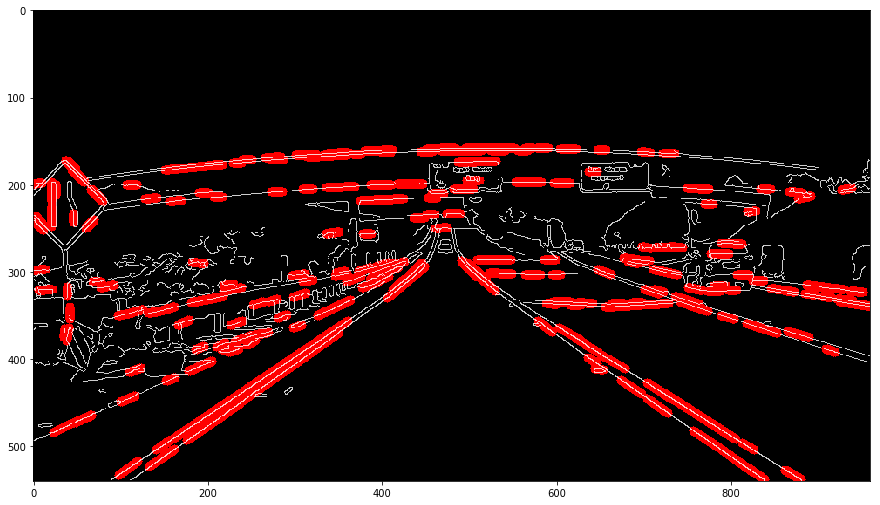

In [9]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.figure(figsize=(15,15))
plt.imshow(combo)

- [numpy.dstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dstack.html)
- [cv2.addWeighted](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#addweighted)
- [cv2.bitwise_and](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and), [betwise operation example](http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html)

As you can see I've detected lots of line segments! Your job, in the next exercise, is to figure out which parameters do the best job of optimizing the detection of the lane lines. Then, you'll want to apply a region of interest mask to filter out detected line segments in other areas of the image. Earlier in this lesson you used a triangular region mask, but this time you'll get a chance to use a quadrilateral region mask using the [cv2.fillPoly()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#fillpoly) function (keep in mind though, you could use this same method to mask an arbitrarily complex polygon region). When you're finished you'll be ready to apply the skills you've learned to do the project at the end of this lesson.

Now it's your turn to play with the Hough Transform on an edge-detected image. You'll start with the image on the left below. If you "Test Run" the quiz, you'll get output that looks like the center image. Your job is to modify the parameters for the Hough Transform and impose a region of interest mask to get output that looks like the image on the right. In the code, I've given you a framework for defining a quadrilateral region of interest mask.
<img src="Quiz10.png" width="45000">

The original image (left), edge detection and Hough transform (center), parameters optimized and region masked on the right.

Shape of Image: (540, 960, 3) 540 960
masked_edges:  (540, 960)
Hough Lines:  (11, 1, 4)


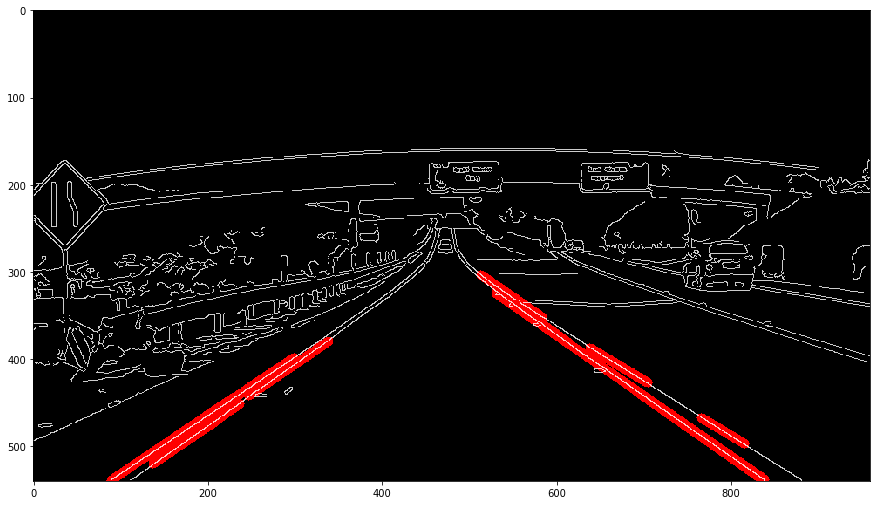

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
print("Shape of Image:", imshape, imshape[0], imshape[1])
vertices = np.array([[(70,imshape[0]),(410, 330), (510, 300), (891,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
print("masked_edges: ", masked_edges.shape)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2.3 # distance resolution in pixels of the Hough grid
theta = (4.3*np.pi)/180 # angular resolution in radians of the Hough grid
threshold = 100     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 30    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
print("Hough Lines: ", lines.shape)
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.figure(figsize=(15, 15))
plt.imshow(lines_edges)